# Can bias be eliminated by adding a constant to the forecast?
### specifically, adding the difference between the last training data point and the prediction of the last training data point

In [13]:
from koopman_probabilistic import *
from model_objs import *
import vanilla_benchmark

import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from scipy.stats import norm, skewnorm, skew

## Pinball Loss

In [14]:
def skew_pinball_loss(data, mus, sigmas, alphas, quantiles=range(10, 100, 10)):
    loss = 0
    for i in range(len(data)):
        for q in quantiles:
            q = q / 100
            quant_pred = skewnorm.ppf(q, alphas[i], loc=mus[i], scale=sigmas[i])
            if quant_pred > data[i]:
                loss += (quant_pred - data[i]) * (1 - q)
            else:
                loss += (data[i] - quant_pred) * q
    return loss / (len(data) * len(quantiles))

In [15]:
def normal_pdf(mu, sigma, x):
    return np.exp(-(x - mu)**2 / (2 * sigma**2))/((2 * np.pi * sigma**2)**0.5)

## Vanilla Benchmark Forecast

In [16]:
min_train_start = 9 * 365 * 24 + 2 * 24  # 2 leap years in from 2005 to 2014
train_starts = np.linspace(min_train_start, min_train_start + 24 * 365 - 24, 12, endpoint=False).astype(int)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [17]:
print(list(train_starts))

[78888, 79616, 80344, 81072, 81800, 82528, 83256, 83984, 84712, 85440, 86168, 86896]


In [18]:
zone_name = "ISONE CA"

In [19]:
vanilla_losses = [296.8847544483837, 430.00821029385423, 249.76186323507005, 228.45341573067495, 367.92242571414795, 359.81620926123105, 573.6220447228848, 663.6710716952123, 596.4665211942336, 211.61053854835038, 309.02862777154513, 430.58429049360274]

ISONE CA


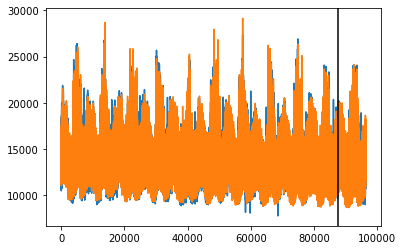

k = 49


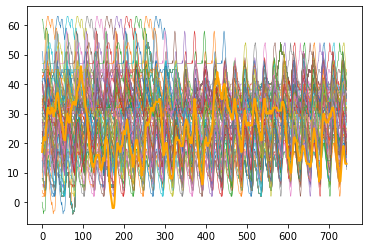

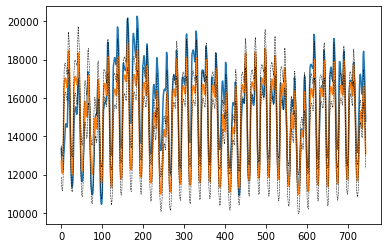

{'ISONE CA': 404.54749173914837}
ISONE CA


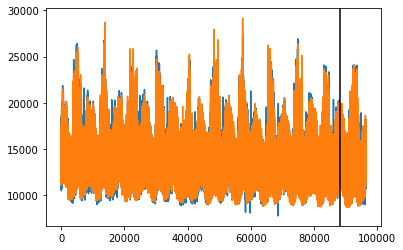

k = 49


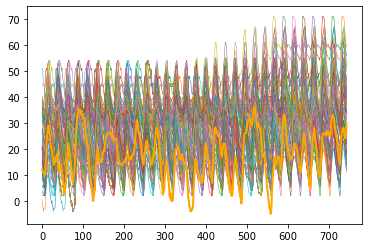

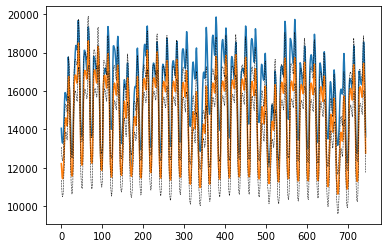

{'ISONE CA': 560.550038893113}
ISONE CA


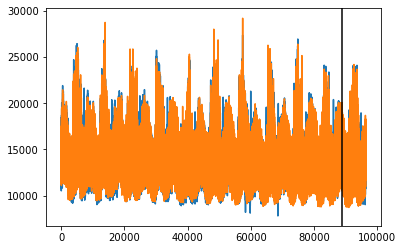

k = 49


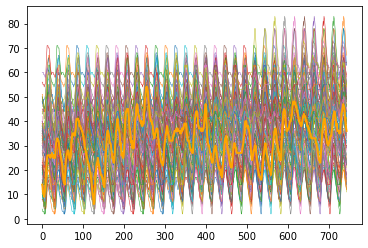

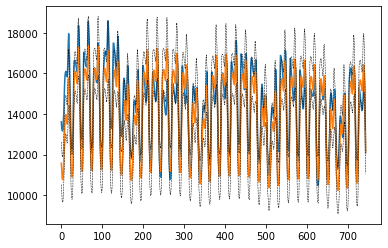

{'ISONE CA': 309.5589186230228}
ISONE CA


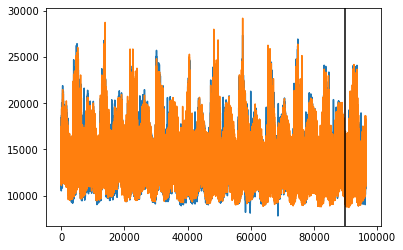

k = 49


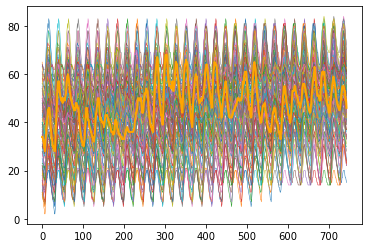

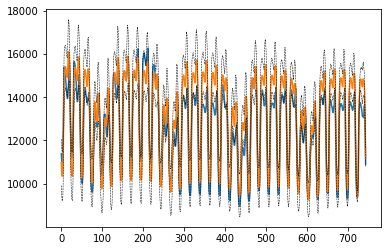

{'ISONE CA': 227.76872691850102}
ISONE CA


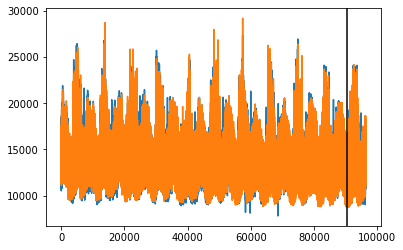

k = 49


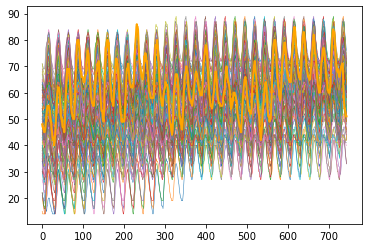

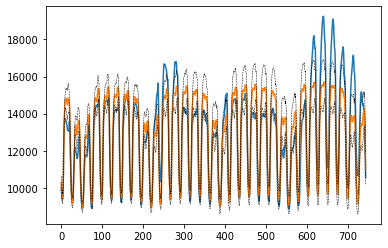

{'ISONE CA': 324.1483557619427}
ISONE CA


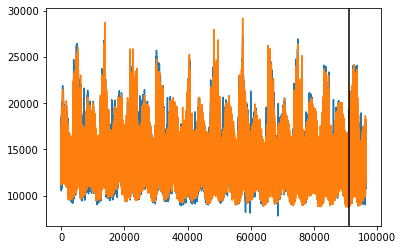

k = 49


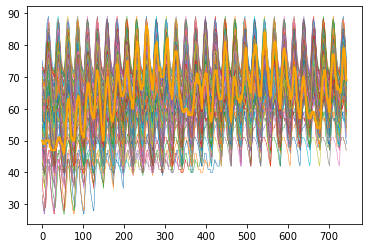

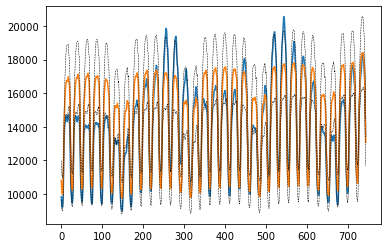

{'ISONE CA': 387.15962748204333}
ISONE CA


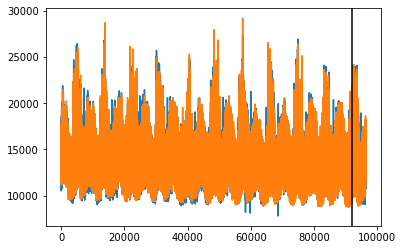

k = 49


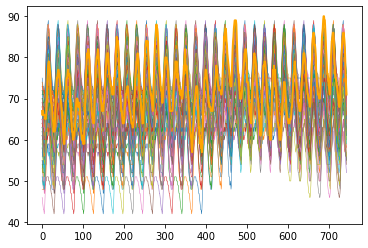

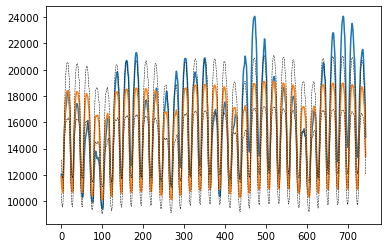

{'ISONE CA': 585.258703836423}
ISONE CA


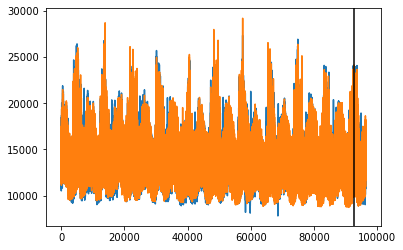

k = 49


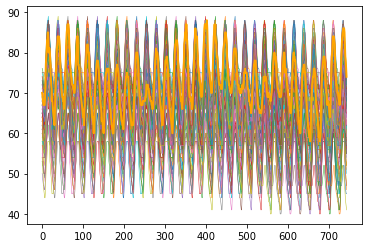

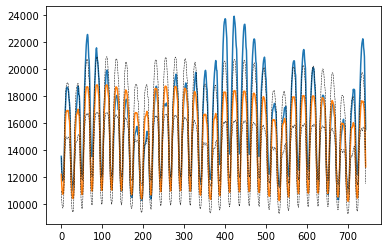

{'ISONE CA': 617.051816732066}
ISONE CA


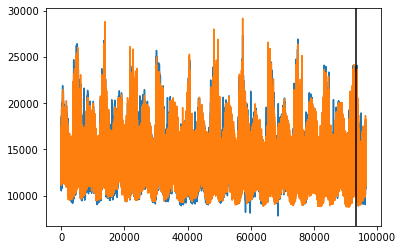

k = 49


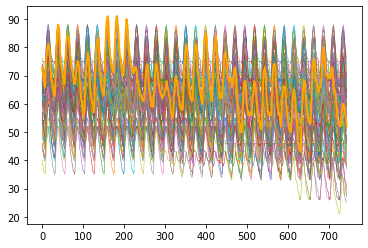

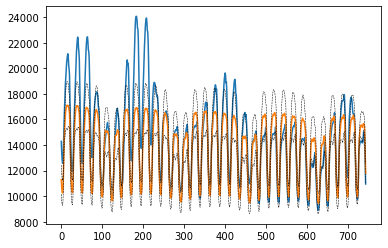

{'ISONE CA': 593.454813745602}
ISONE CA


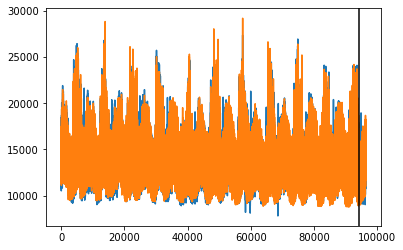

k = 49


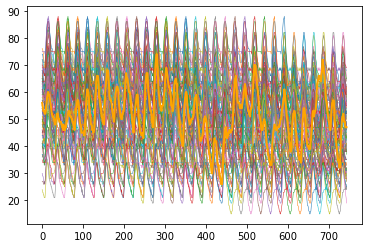

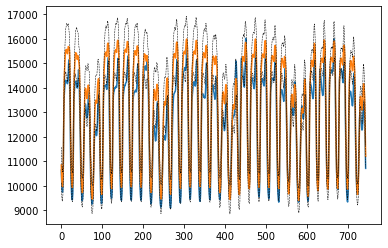

{'ISONE CA': 232.5760765639765}
ISONE CA


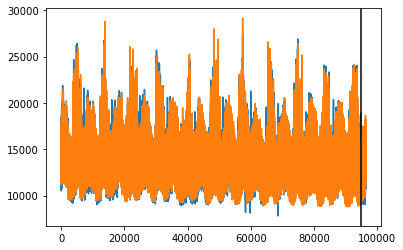

k = 49


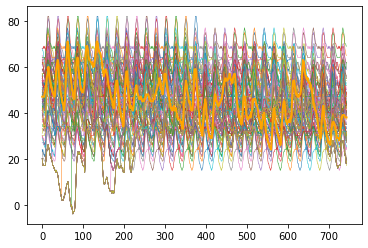

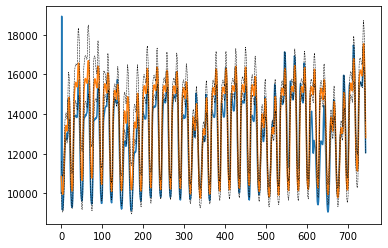

{'ISONE CA': 293.25879125779574}
ISONE CA


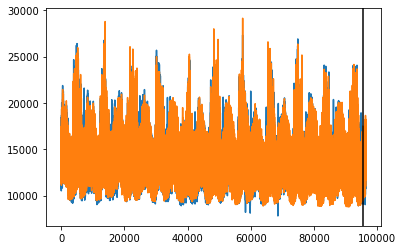

k = 49


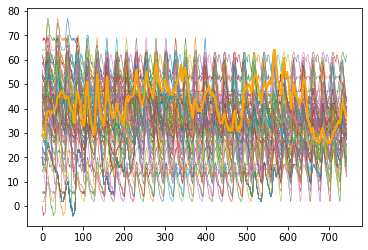

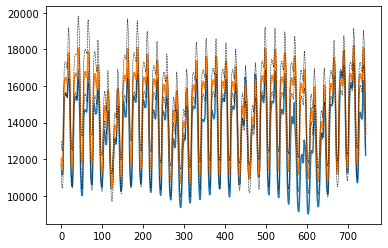

{'ISONE CA': 425.4610557153496}


In [20]:
vanilla_losses = []
for month in range(1, len(months) + 1):
    vanilla_losses.append(vanilla_benchmark.get_lossesGEFCom(10, 31 * 24, start_date=pd.Timestamp(f"2005-{month}-01"), zones=["ISONE CA"],
                              delay_days=0, temp_years=[2014], plot=True)["ISONE CA"])

In [35]:
for i, loss in list(enumerate(vanilla_losses))[::2]:
    print(np.round(loss, 1), end="\t")

404.5	309.6	324.1	585.3	593.5	293.3	

In [22]:
import json

with open("GEFCom2017\\GEFCom2017-Qual\\GEFCom2017Qual2005-2015.json") as f:
    all_data = json.loads(f.read())
    
data = np.transpose(np.array([all_data[zone_name]["DEMAND"]], dtype=np.float64))

In [23]:
# rescale data
x_original = data
mean = np.mean(data, axis=0)
rnge = np.max(data, axis=0) - np.min(data, axis=0)
data = (data - np.matlib.repmat(mean, data.shape[0], 1)) / np.matlib.repmat(rnge, data.shape[0], 1)
print("data", data.shape)

data (96408, 1)


# Forecasting mean, variance, and skewness of Skew-Normal distribution

In [36]:
%matplotlib inline
z_scores = []
test_z_scores = []
losses = []
relative_perfs = []

TRAIN START: 78888 = 2014-01-01 00:00:00
x (9504, 1)
xt (8760, 1)
Loss at iteration 10: 1.6072184394452036
Loss at iteration 60: -1.6888097643718614
Loss at iteration 110: -1.852896727782363
Loss at iteration 160: -1.9111675859756496
Loss at iteration 210: -1.9607427103699955
Loss at iteration 260: -1.9910086907362652
Loss at iteration 310: -2.026201089804139
Loss at iteration 360: -2.050489267983215
Loss at iteration 410: -2.066500928634123
Loss at iteration 460: -2.0797644720854533
Loss at iteration 510: -2.090690764300517
Loss at iteration 560: -2.1001777372323533
Final loss: -2.1070698554563907


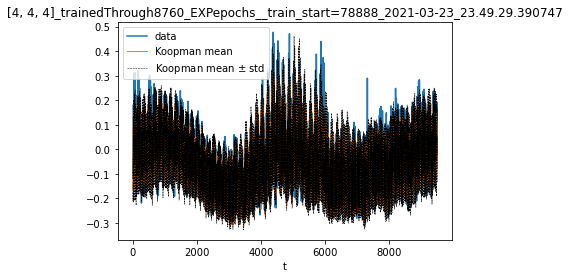

actual overall mean: 0  predicted mean: -0.026345871


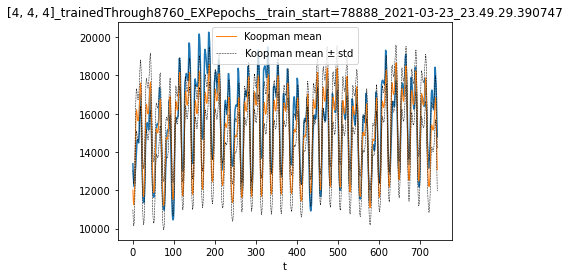

pinball_loss: 317.0445965647869
21.629820221647357% performance relative to vanilla benchmark





TRAIN START: 80344 = 2014-03-02 00:00:00
x (9504, 1)
xt (8760, 1)
Loss at iteration 10: 1.6218583954247248
Loss at iteration 60: -1.6093517315991792
Loss at iteration 110: -1.8679438415207423
Loss at iteration 160: -1.9413240411057215
Loss at iteration 210: -1.983506814940101
Loss at iteration 260: -2.022079532650871
Loss at iteration 310: -2.0520750633551113
Loss at iteration 360: -2.0735431713611767
Loss at iteration 410: -2.0917260804927866
Loss at iteration 460: -2.1071995368110814
Loss at iteration 510: -2.1205750952900284
Loss at iteration 560: -2.132539754608154
Final loss: -2.1412526306671205


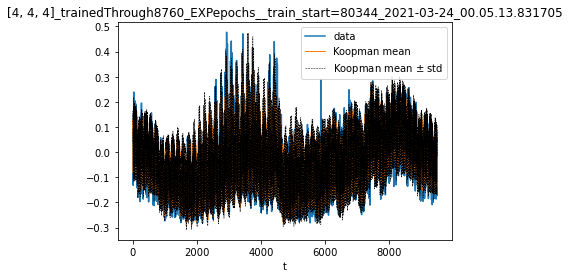

actual overall mean: 0  predicted mean: -0.0025418347


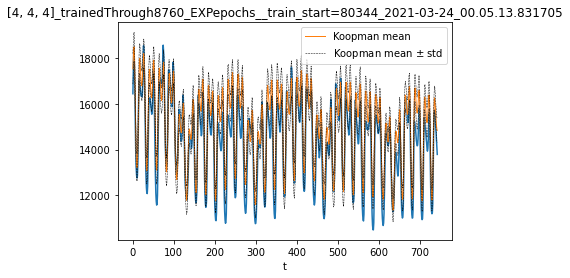

pinball_loss: 287.42039889847996
7.151633628589737% performance relative to vanilla benchmark





TRAIN START: 81800 = 2014-05-02 00:00:00
x (9504, 1)
xt (8760, 1)
Loss at iteration 10: 1.2852181823161306
Loss at iteration 60: -1.6400711051654298
Loss at iteration 110: -1.8752132277607867
Loss at iteration 160: -1.949493425468284
Loss at iteration 210: -2.003237482721315
Loss at iteration 260: -2.023052353647101
Loss at iteration 310: -2.047307995091486
Loss at iteration 360: -2.0715562691885645
Loss at iteration 410: -2.0902812531727193
Loss at iteration 460: -2.1081061782646726
Loss at iteration 510: -2.1247515221200106
Loss at iteration 560: -2.1406044096616124
Final loss: -2.152228620601697


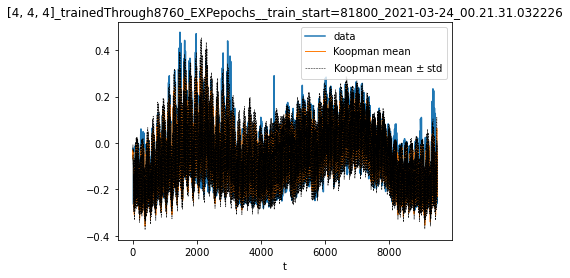

actual overall mean: 0  predicted mean: -0.024157224


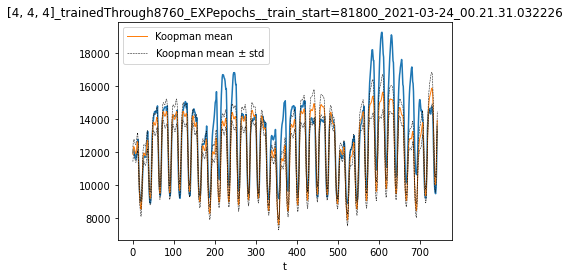

pinball_loss: 389.1442036794972
-20.051265651116857% performance relative to vanilla benchmark





TRAIN START: 83256 = 2014-07-02 00:00:00
x (9504, 1)
xt (8760, 1)
Loss at iteration 10: 1.7187398253285093
Loss at iteration 60: -1.667144648624135
Loss at iteration 110: -1.8057044441614396
Loss at iteration 160: -1.8621200594351845
Loss at iteration 210: -1.9007816139330453
Loss at iteration 260: -1.9299320121274628
Loss at iteration 310: -1.949447469848831
Loss at iteration 360: -1.9656282342930944
Loss at iteration 410: -1.9783159595748596
Loss at iteration 460: -1.9902174914684174
Loss at iteration 510: -2.0008264519701724
Loss at iteration 560: -2.0106939166517432
Final loss: -2.0183333139657296


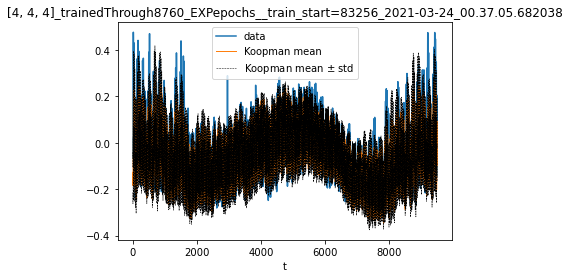

actual overall mean: 0  predicted mean: -0.032848306


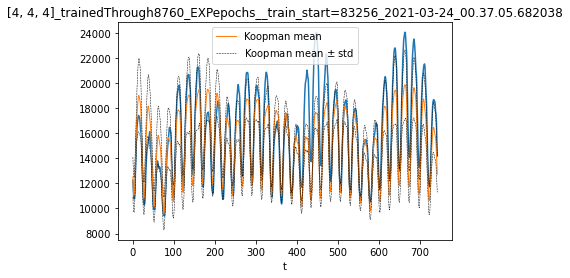

pinball_loss: 550.9114443289924
5.868731089735412% performance relative to vanilla benchmark





TRAIN START: 84712 = 2014-08-31 00:00:00
x (9504, 1)
xt (8760, 1)
Loss at iteration 10: 1.5876741384548847
Loss at iteration 60: -1.4786887791434171
Loss at iteration 110: -1.7309603185674998
Loss at iteration 160: -1.8032891157189466
Loss at iteration 210: -1.8715103044740926
Loss at iteration 260: -1.9044268926416998
Loss at iteration 310: -1.937234761974243
Loss at iteration 360: -1.961907199936745
Loss at iteration 410: -1.9799435310953564
Loss at iteration 460: -1.992500919609575
Loss at iteration 510: -2.0074690093739993
Loss at iteration 560: -2.0234228001010477
Final loss: -2.0346586625234955


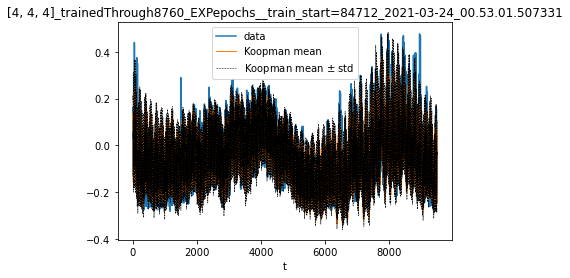

actual overall mean: 0  predicted mean: -0.011126079


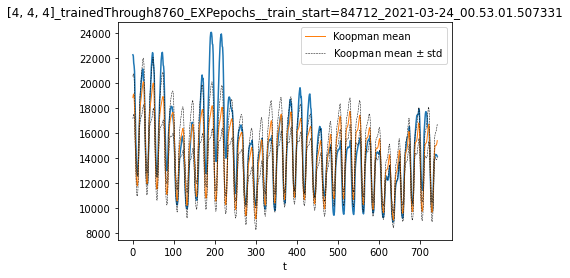

pinball_loss: 490.1460325171507
17.40802818270457% performance relative to vanilla benchmark





TRAIN START: 86168 = 2014-10-31 00:00:00
x (9504, 1)
xt (8760, 1)
Loss at iteration 10: 1.7271212503884215
Loss at iteration 60: -1.5442497909155917
Loss at iteration 110: -1.7415608213201235
Loss at iteration 160: -1.8220313426693728
Loss at iteration 210: -1.8490926125725335
Loss at iteration 260: -1.8952979213617331
Loss at iteration 310: -1.9204943630140277
Loss at iteration 360: -1.9455051228039717
Loss at iteration 410: -1.9642749159564354
Loss at iteration 460: -1.9833887166678261
Loss at iteration 510: -2.0036517361293376
Loss at iteration 560: -2.0219272936722836
Final loss: -2.033800394860157


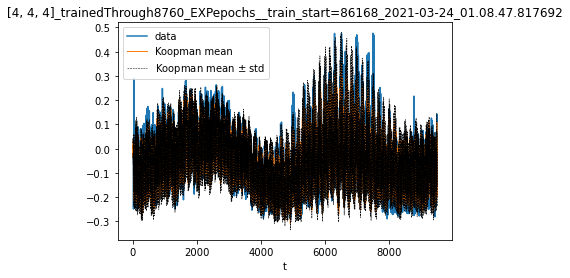

actual overall mean: 0  predicted mean: -0.017185118


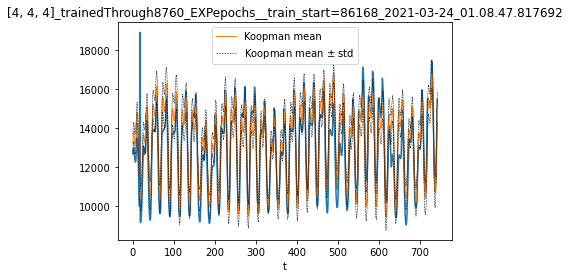

pinball_loss: 277.16166065256107
5.48905304294326% performance relative to vanilla benchmark







In [37]:
for month, train_start in list(enumerate(train_starts))[::2]:
    print("TRAIN START:", train_start, "=", all_data[zone_name]["Date"][train_start])
    
    train_through = 365 * 24
    delay = 0  # 52 * 24
    predict_through = train_through + 24 * 31 + delay  
    x = data[train_start:]
    x = x[:predict_through]
    xt = x[:train_through]
    num_freqs = [4, 4, 4]
    num_fourier = 4
    loss_weights = 1 + 0.4 * torch.cos(torch.linspace(0, 2 * np.pi, xt.shape[0]))
    print("x", x.shape)
    print("xt", xt.shape)
    
    now = ("_".join(str(datetime.now()).split())).replace(":", ".")
    data_name = "EXPepochs_" + f"_train_start={train_start}_" + now

    ### TRAIN ###
    model = AlternatingSkewNLL(x_dim=xt.shape[1], num_freqs=num_freqs, n=256)
    k = KoopmanProb(model, device='cpu', sample_num=24, num_fourier_modes=num_fourier, batch_size=32)
    
    k.find_fourier_omegas(xt, hard_code=[24, 168, 24 * 365.25 / 12, 24 * 365.25])
    
    k.fit(xt, iterations=600, verbose=False, cutoff=0, weight_decay=1e-3, lr_theta=1e-4, lr_omega=0);

    fname = "forecasts//" + data_name + f"trained{train_start}-{train_through}_{num_freqs}"
    mu_file = fname + "mu.npy"
    sigma_file = fname + "sigma.npy"
    alpha_file = fname + "alpha.npy"    

    ### FORECAST ###
    params = k.predict(predict_through)
    mu_hat, sigma_hat, a_hat = params
    # ADD TO CORRECT BIAS                                                    
#     mu_hat += xt[train_through - 1] - mu_hat[train_through - 1]            # <<< CHANGE THIS LINE TO EXPERIMENT
    np.save(mu_file, mu_hat)
    np.save(sigma_file, sigma_hat)
    np.save(alpha_file, a_hat)

    mean_hat = model.mean(params)
    std_hat = model.std(params)

    dim = 0
    plt.figure()
    # plt.scatter(np.arange(-slc), x[slc:], label="data")
    plt.plot(x[:predict_through, dim], label="data")
    plt.plot(mean_hat[:, dim], label="Koopman mean", linewidth=1)
    plt.plot(mean_hat[:, dim] + std_hat[:, dim], "--", color="black", label="Koopman mean $\pm$ std", linewidth=0.5)
    plt.plot(mean_hat[:, dim] - std_hat[:, dim], "--", color="black", linewidth=0.5)
    #plt.plot(a_hat[:, dim], color="red", linewidth=0.3, label="Koopman $\\alpha$")
    #plt.plot(std_hat[:, dim], color="green", linewidth=0.7, label="Koopman std")

    plt.title(f"{num_freqs}_trainedThrough{train_through}_" + data_name)
    plt.xlabel("t")
    plt.legend()
    plt.show()

    ### ANALYTICS ###
    print("actual overall mean:", 0, " predicted mean:", np.mean(mean_hat[:train_through]))

    z_scores.append((x[:train_through] - mean_hat[:train_through]) / std_hat[:train_through])
    test_z_scores.append(
        (x[train_through + delay:predict_through] - mean_hat[train_through + delay:predict_through]) 
         / std_hat[train_through + delay:predict_through])

    ### PERFORMANCE ###

    #Skew-Normal distribution Rescaling to de-normalize data because pinball loss is not scale-invariant
    test_start = train_through + delay
    sigh, ah = sigma_hat[test_start: predict_through], a_hat[test_start: predict_through]
    delta = ah / (1 + ah ** 2) ** 0.5
    muh = mu_hat[test_start: predict_through] * rnge + (rnge - 1) * delta * sigh * (2 / np.pi) ** 0.5
    muh = muh + mean - (rnge - 1) * delta * sigh * (2 / np.pi) ** 0.5
    sigh = sigh * rnge
    mean_hat = model.mean([muh, sigh, ah])
    std_hat = model.std([muh, sigh, ah])

    plt.figure()
    plt.plot(x_original[train_start:][test_start: predict_through])
    plt.plot(mean_hat[:, dim], label="Koopman mean", linewidth=1)
    plt.plot(mean_hat[:, dim] + std_hat[:, dim], "--", color="black", label="Koopman mean $\pm$ std", linewidth=0.5)
    plt.plot(mean_hat[:, dim] - std_hat[:, dim], "--", color="black", linewidth=0.5)
    # plt.plot(ah[:, dim], color="red", linewidth=0.3, label="Koopman $\\alpha$")
    # plt.plot(std_hat[:, dim], color="green", linewidth=0.7, label="Koopman std")
    plt.title(f"{num_freqs}_trainedThrough{train_through}_" + data_name)
    plt.xlabel("t")
    plt.legend()
    plt.show()

    loss = skew_pinball_loss(x_original[train_start:][test_start: predict_through], muh, sigh, ah)[0]
    relative = (1 - loss/vanilla_losses[month]) * 100
    print("pinball_loss:", loss)
    print(f"{relative}% performance relative to vanilla benchmark" + "\n"*5)
    losses.append(loss)
    relative_perfs.append(relative)

# Figures

In [73]:
# for tables
for loss in losses[:6]:
    print(np.round(loss, 1), end="\t")
print("")
for rel in relative_perfs[:6]:
    print(np.round(rel, 1), end="%\t")

291.9	223.8	347.7	534.1	494.2	391.3	
27.8%	27.7%	-7.3%	8.7%	16.7%	-33.4%	

In [74]:
idx = 6
for z_score in z_scores[:idx]:
    print(np.round(np.mean(z_score), 2), end="\t")
print()
for z_score in z_scores[:idx]:
    print(np.round(np.std(z_score), 2), end="\t")
print()
for z_score in z_scores[:idx]:
    print(np.round(skew(z_score)[0], 2), end="\t")
print()
for z_score in test_z_scores[:idx]:
    print(np.round(np.mean(z_score), 2), end="\t")
print()
for z_score in test_z_scores[:idx]:
    print(np.round(np.std(z_score), 2), end="\t")
print()
for z_score in test_z_scores[:idx]:
    print(np.round(skew(z_score)[0], 2), end="\t")

-0.19	-0.06	-0.2	0.17	0.02	-0.53	
1.06	1.05	1.06	1.09	1.12	1.19	
0.26	0.44	0.64	0.21	0.43	0.55	
0.13	-0.71	0.78	0.64	0.45	-1.4	
0.98	0.94	1.94	1.41	1.49	1.44	
-0.0	0.22	0.66	1.38	0.5	0.93	

In [71]:
z_scores = np.array(z_scores)
test_z_scores = np.array(test_z_scores)
losses = np.array(losses)
relative = np.array(relative_perfs)

In [72]:
np.save("experiments\\" + data_name + "z_scores.npy", z_scores)
np.save("experiments\\" + data_name + "test_z_scores.npy", test_z_scores)
np.save("experiments\\" + data_name + "relative_perfs.npy", relative_perfs)
np.save("experiments\\" + data_name + "losses.npy", losses)

In [69]:
import os
%matplotlib inline
z_scores = []
test_z_scores = []
losses = []
relative_perfs = []

TRAIN START: 78888 = 2014-01-01 00:00:00
x (9504, 1)
xt (8760, 1)
EXPepochs__train_start=78888_2021-03-23_23.49.29.390747trained78888-8760_[4, 4, 4]alpha.npy
EXPepochs__train_start=78888_2021-03-23_23.49.29.390747trained78888-8760_[4, 4, 4]mu.npy
EXPepochs__train_start=78888_2021-03-23_23.49.29.390747trained78888-8760_[4, 4, 4]sigma.npy


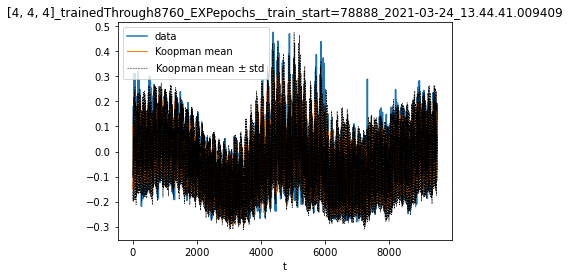

actual overall mean: 0  predicted mean: -0.011606111


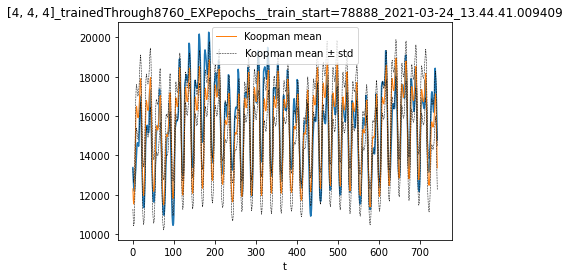

pinball_loss: 291.89131797334653
27.847453282059252% performance relative to vanilla benchmark





TRAIN START: 80344 = 2014-03-02 00:00:00
x (9504, 1)
xt (8760, 1)
EXPepochs__train_start=80344_2021-03-24_00.05.13.831705trained80344-8760_[4, 4, 4]alpha.npy
EXPepochs__train_start=80344_2021-03-24_00.05.13.831705trained80344-8760_[4, 4, 4]mu.npy
EXPepochs__train_start=80344_2021-03-24_00.05.13.831705trained80344-8760_[4, 4, 4]sigma.npy


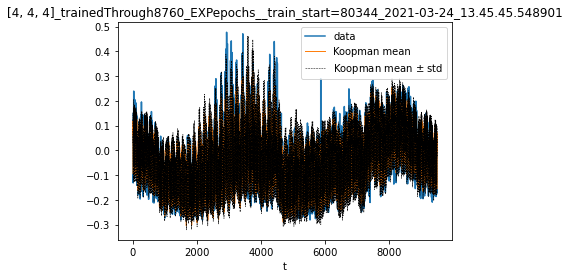

actual overall mean: 0  predicted mean: -0.014702756


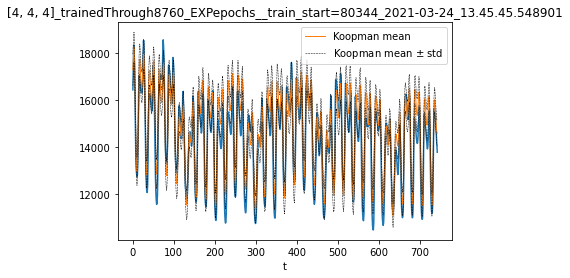

pinball_loss: 223.84660552666793
27.68852969173675% performance relative to vanilla benchmark





TRAIN START: 81800 = 2014-05-02 00:00:00
x (9504, 1)
xt (8760, 1)
EXPepochs__train_start=81800_2021-03-24_00.21.31.032226trained81800-8760_[4, 4, 4]alpha.npy
EXPepochs__train_start=81800_2021-03-24_00.21.31.032226trained81800-8760_[4, 4, 4]mu.npy
EXPepochs__train_start=81800_2021-03-24_00.21.31.032226trained81800-8760_[4, 4, 4]sigma.npy


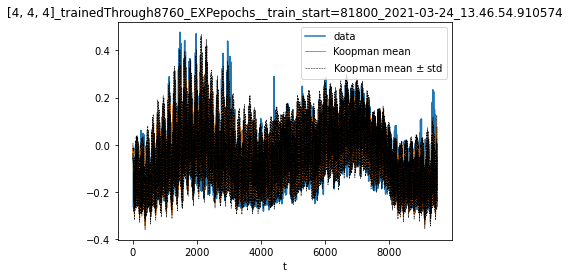

actual overall mean: 0  predicted mean: -0.010172849


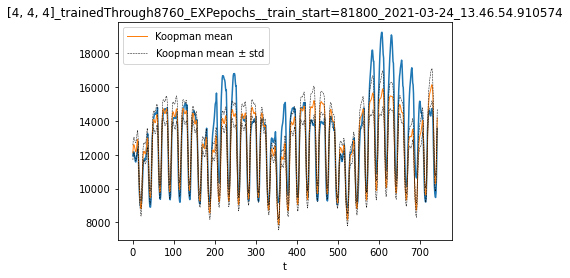

pinball_loss: 347.6882869362891
-7.262085633293891% performance relative to vanilla benchmark





TRAIN START: 83256 = 2014-07-02 00:00:00
x (9504, 1)
xt (8760, 1)
EXPepochs__train_start=83256_2021-03-24_00.37.05.682038trained83256-8760_[4, 4, 4]alpha.npy
EXPepochs__train_start=83256_2021-03-24_00.37.05.682038trained83256-8760_[4, 4, 4]mu.npy
EXPepochs__train_start=83256_2021-03-24_00.37.05.682038trained83256-8760_[4, 4, 4]sigma.npy


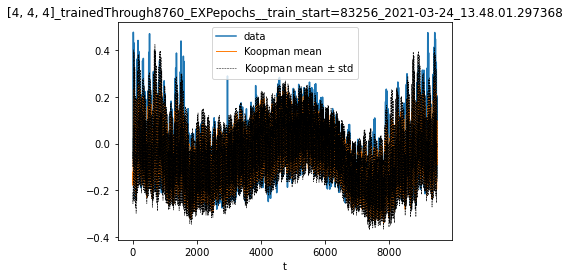

actual overall mean: 0  predicted mean: -0.027208457


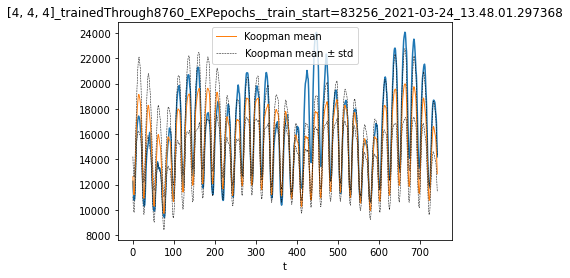

pinball_loss: 534.0927179208887
8.742456212976702% performance relative to vanilla benchmark





TRAIN START: 84712 = 2014-08-31 00:00:00
x (9504, 1)
xt (8760, 1)
EXPepochs__train_start=84712_2021-03-24_00.53.01.507331trained84712-8760_[4, 4, 4]alpha.npy
EXPepochs__train_start=84712_2021-03-24_00.53.01.507331trained84712-8760_[4, 4, 4]mu.npy
EXPepochs__train_start=84712_2021-03-24_00.53.01.507331trained84712-8760_[4, 4, 4]sigma.npy


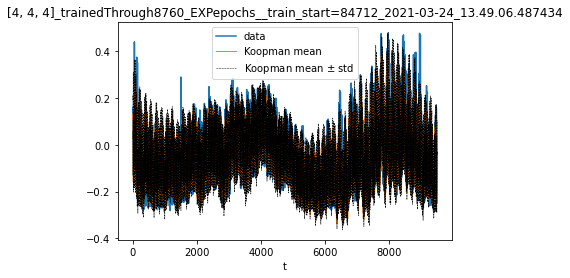

actual overall mean: 0  predicted mean: -0.013762748


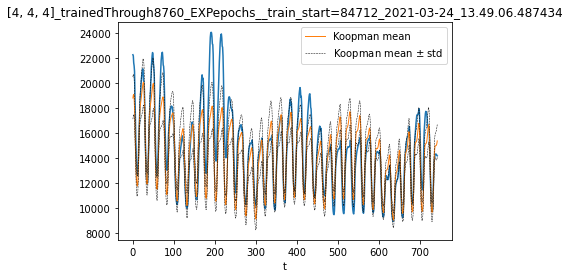

pinball_loss: 494.1851529072174
16.727416905061755% performance relative to vanilla benchmark





TRAIN START: 86168 = 2014-10-31 00:00:00
x (9504, 1)
xt (8760, 1)
EXPepochs__train_start=86168_2021-03-24_01.08.47.817692trained86168-8760_[4, 4, 4]alpha.npy
EXPepochs__train_start=86168_2021-03-24_01.08.47.817692trained86168-8760_[4, 4, 4]mu.npy
EXPepochs__train_start=86168_2021-03-24_01.08.47.817692trained86168-8760_[4, 4, 4]sigma.npy


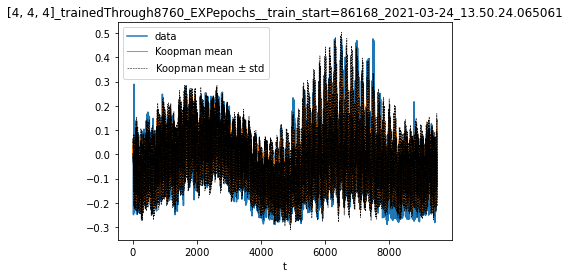

actual overall mean: 0  predicted mean: 0.006270851


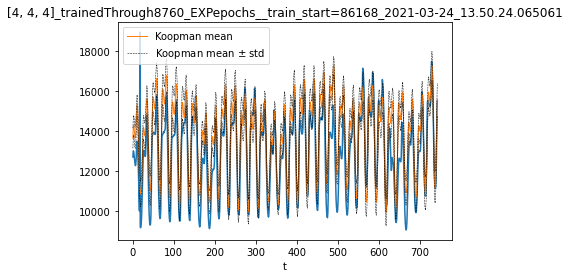

pinball_loss: 391.2521414124821
-33.415315440123706% performance relative to vanilla benchmark







In [70]:
path = "C:\\Users\\ATMal\\PycharmProjects\\koopman-forecasting\\forecasts\\experiment10"
for month, train_start in list(enumerate(train_starts))[::2]:
    print("TRAIN START:", train_start, "=", all_data[zone_name]["Date"][train_start])
    
    train_through = 365 * 24
    delay = 0  # 52 * 24
    predict_through = train_through + 24 * 31 + delay  
    x = data[train_start:]
    x = x[:predict_through]
    xt = x[:train_through]
    num_freqs = [4, 4, 4]
    num_fourier = 4
    loss_weights = 1 + 0.4 * torch.cos(torch.linspace(0, 2 * np.pi, xt.shape[0]))
    print("x", x.shape)
    print("xt", xt.shape)
    
    now = ("_".join(str(datetime.now()).split())).replace(":", ".")
    data_name = "EXPepochs_" + f"_train_start={train_start}_" + now

    ### TRAIN ###
    model = AlternatingSkewNLL(x_dim=xt.shape[1], num_freqs=num_freqs, n=256)
    
    ### GET OLD DATA
    for fname in os.listdir(path):
        if fname.startswith(f"EXPepochs__train_start={train_start}"):
            print(fname)
            if fname.endswith("alpha.npy"):
                a_hat = np.load(os.path.join(path, fname))
            if fname.endswith("sigma.npy"):
                sigma_hat = np.load(os.path.join(path, fname))
            if fname.endswith("mu.npy"):
                mu_hat = np.load(os.path.join(path, fname))
    params = (mu_hat, sigma_hat, a_hat)
    
    fname = "forecasts//" + data_name + f"trained{train_start}-{train_through}_{num_freqs}"
    mu_file = fname + "mu.npy"
    sigma_file = fname + "sigma.npy"
    alpha_file = fname + "alpha.npy"    
    
    mu_hat += np.median(xt) - np.median(mu_hat[:train_through])            # <<< CHANGE THIS LINE TO EXPERIMENT
    np.save(mu_file, mu_hat)
    np.save(sigma_file, sigma_hat)
    np.save(alpha_file, a_hat)

    mean_hat = model.mean(params)
    std_hat = model.std(params)

    dim = 0
    plt.figure()
    # plt.scatter(np.arange(-slc), x[slc:], label="data")
    plt.plot(x[:predict_through, dim], label="data")
    plt.plot(mean_hat[:, dim], label="Koopman mean", linewidth=1)
    plt.plot(mean_hat[:, dim] + std_hat[:, dim], "--", color="black", label="Koopman mean $\pm$ std", linewidth=0.5)
    plt.plot(mean_hat[:, dim] - std_hat[:, dim], "--", color="black", linewidth=0.5)
    #plt.plot(a_hat[:, dim], color="red", linewidth=0.3, label="Koopman $\\alpha$")
    #plt.plot(std_hat[:, dim], color="green", linewidth=0.7, label="Koopman std")

    plt.title(f"{num_freqs}_trainedThrough{train_through}_" + data_name)
    plt.xlabel("t")
    plt.legend()
    plt.show()

    ### ANALYTICS ###
    print("actual overall mean:", 0, " predicted mean:", np.mean(mean_hat[:train_through]))

    z_scores.append((x[:train_through] - mean_hat[:train_through]) / std_hat[:train_through])
    test_z_scores.append(
        (x[train_through + delay:predict_through] - mean_hat[train_through + delay:predict_through]) 
         / std_hat[train_through + delay:predict_through])

    ### PERFORMANCE ###

    #Skew-Normal distribution Rescaling to de-normalize data because pinball loss is not scale-invariant
    test_start = train_through + delay
    sigh, ah = sigma_hat[test_start: predict_through], a_hat[test_start: predict_through]
    delta = ah / (1 + ah ** 2) ** 0.5
    muh = mu_hat[test_start: predict_through] * rnge + (rnge - 1) * delta * sigh * (2 / np.pi) ** 0.5
    muh = muh + mean - (rnge - 1) * delta * sigh * (2 / np.pi) ** 0.5
    sigh = sigh * rnge
    mean_hat = model.mean([muh, sigh, ah])
    std_hat = model.std([muh, sigh, ah])

    plt.figure()
    plt.plot(x_original[train_start:][test_start: predict_through])
    plt.plot(mean_hat[:, dim], label="Koopman mean", linewidth=1)
    plt.plot(mean_hat[:, dim] + std_hat[:, dim], "--", color="black", label="Koopman mean $\pm$ std", linewidth=0.5)
    plt.plot(mean_hat[:, dim] - std_hat[:, dim], "--", color="black", linewidth=0.5)
    # plt.plot(ah[:, dim], color="red", linewidth=0.3, label="Koopman $\\alpha$")
    # plt.plot(std_hat[:, dim], color="green", linewidth=0.7, label="Koopman std")
    plt.title(f"{num_freqs}_trainedThrough{train_through}_" + data_name)
    plt.xlabel("t")
    plt.legend()
    plt.show()

    loss = skew_pinball_loss(x_original[train_start:][test_start: predict_through], muh, sigh, ah)[0]
    relative = (1 - loss/vanilla_losses[month]) * 100
    print("pinball_loss:", loss)
    print(f"{relative}% performance relative to vanilla benchmark" + "\n"*5)
    losses.append(loss)
    relative_perfs.append(relative)

Text(0, 0.5, 'standardized residual $z$')

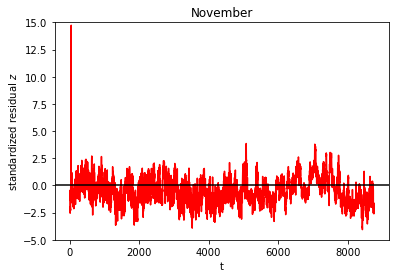

In [77]:
plt.plot(z_scores[5], color="r")
plt.title("November")
plt.axhline(0, color="k")
plt.xlabel("t")
plt.ylim([-5, 15])
plt.ylabel("standardized residual $z$")